In [16]:
%matplotlib notebook
import numpy as np
import wafo.data as wd
import wafo.stats as ws
import matplotlib.pyplot as plt
# import mpld3
# mpld3.enable_notebook()  # Enable interactive plots

Chapter 5 Extreme value analysis
=================================

Of particular interest in wave analysis is how to find extreme quantiles and extreme significant values for a wave series. Often this implies going outside the range of observed data, i.e. to predict, from a limited number of observations, how large the extreme values might be. Such analysis is
commonly known as Weibull analysis or Gumbel analysis, from the names of two familiar extreme value distributions. WAFO contains routines for fitting of such distributions, both for the Weibull and Gumbel distributions, and for two more general classes of distributions, the Generalized Pareto
Distribution (GPD) and the Generalized Extreme Value distribution (GEV).

Section 5.1 Weibull and Gumbel papers
--------------------------------------

Significant wave-height data on Weibull paper, on Gumbel paper and logarithm of data on Normal probability paper:


<IPython.core.display.Javascript object>


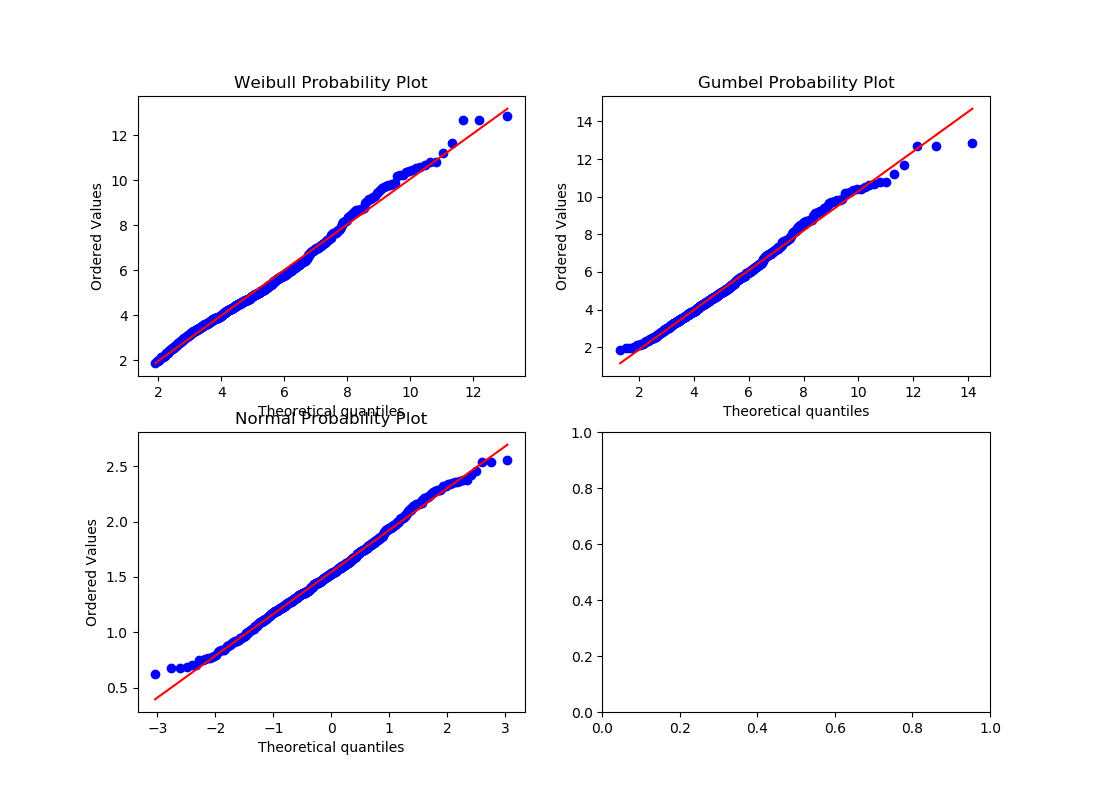

c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:1575: UserWarning: P-value is on the conservative side (i.e. too large) due to ties in the data!
  'P-value is on the conservative side (i.e. too large) due to' +


In [17]:
fig, ax = plt.subplots(2, 2, figsize=(11, 8))
Hs = wd.atlantic()
wei = ws.weibull_min.fit2(Hs)
gum = ws.gumbel_r.fit2(Hs)
axf = ax.ravel()
tmp = ws.probplot(Hs, wei.par, dist='weibull_min', plot=axf[0])
axf[0].set_title('Weibull Probability Plot')
tmp = ws.probplot(Hs, gum.par, dist='gumbel_r', plot=axf[1])
axf[1].set_title('Gumbel Probability Plot')
tmp = ws.probplot(np.log(Hs), plot=axf[2])
_=axf[2].set_title('Normal Probability Plot')

Return values in the Gumbel distribution

<IPython.core.display.Javascript object>


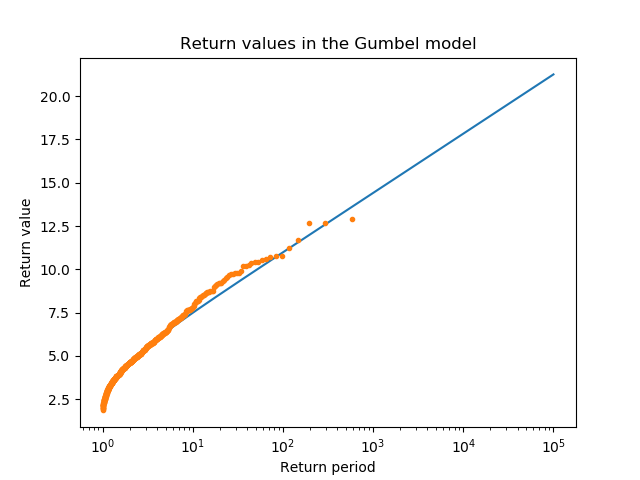

In [18]:
fig, axes = plt.subplots()
T=np.r_[2:100001]
# print(gum.par)
# sT=gum.par[1] - gum.par[0]*np.log(-np.log1p(-1./T));
sT = gum.isf(1./T)
plt.semilogx(T,sT)

N=np.r_[1:len(Hs)+1]; 
Nmax=max(N);
plt.plot(Nmax/N, sorted(Hs, reverse=True),'.')
plt.title('Return values in the Gumbel model')
plt.xlabel('Return period')
_=plt.ylabel('Return value') 


Section 5.2 Generalized Pareto and Extreme Value distributions
----------------------------------------------------------
Section 5.2.1 Generalized Extreme Value distribution
-------------------------------------------------

Empirical distribution of significant wave-height with estimated Generalized Extreme Value distribution

c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:1575: UserWarning: P-value is on the conservative side (i.e. too large) due to ties in the data!
  'P-value is on the conservative side (i.e. too large) due to' +


<IPython.core.display.Javascript object>


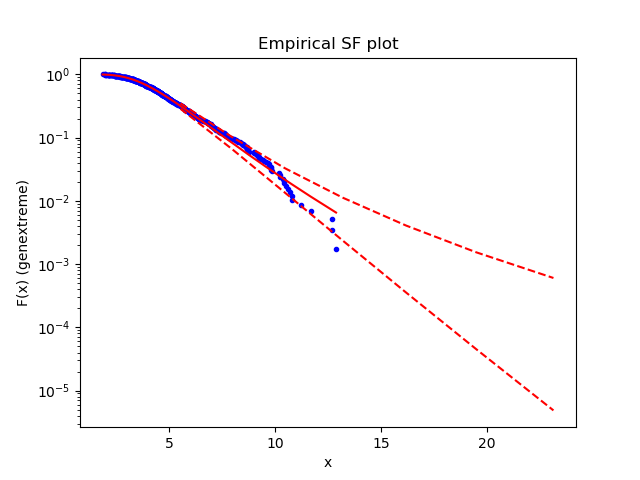

In [19]:
gev = ws.genextreme.fit2(Hs)
fig, axes = plt.subplots()
gev.plotesf(plot_ci=True)

<IPython.core.display.Javascript object>


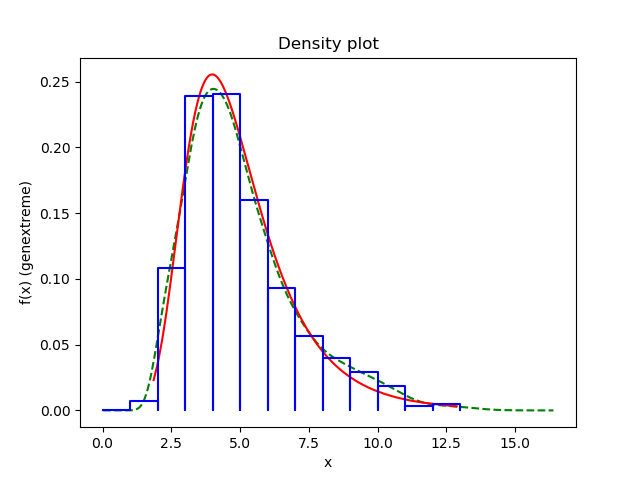

In [20]:
import wafo.kdetools as wk
fig, axes = plt.subplots()
wk.TKDE(Hs, L2=0.5)(output='plot').plot('g--')

gev.plotepdf() 

Analysis of yura87 wave data. 
 Wave data interpolated (spline) and organized in 5-minute intervals
Normalized to mean 0 and std = 1 to get stationary conditions. 
maximum level over each 5-minute interval analysed by GEV

<IPython.core.display.Javascript object>


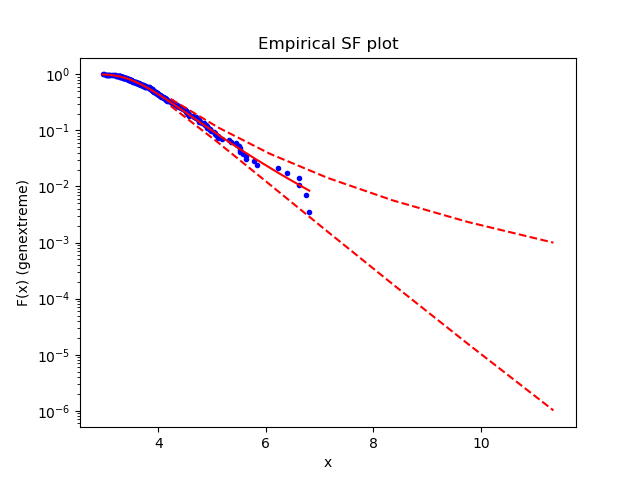

In [21]:
import scipy.interpolate as si
xn  = wd.yura87()
XI  = np.r_[0:len(xn):0.25]
N   = len(XI)
n_5min = 4 * 60 * 5  # 5 min of data
N = N - np.mod(N, n_5min); 
YI  = si.UnivariateSpline(xn[:,0].ravel(), xn[:,1].ravel(), k=3,s=0)(XI[:N])
YI  = np.reshape(YI, (n_5min, N//n_5min))  # Each column holds 5 minutes of interpolated data.
Y5  = (YI-YI.mean(axis=0))/(YI.std(axis=0))
Y5M = Y5.max(axis=0)
Y5gev = ws.genextreme.fit2(Y5M,method='mps')
fig, axes = plt.subplots()
Y5gev.plotesf(plot_ci=True)


Section 5.2.2 Generalized Pareto distribution
-------------------------------------------
Exceedances of significant wave-height data over level 3.

c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:1575: UserWarning: P-value is on the conservative side (i.e. too large) due to ties in the data!
  'P-value is on the conservative side (i.e. too large) due to' +


<IPython.core.display.Javascript object>


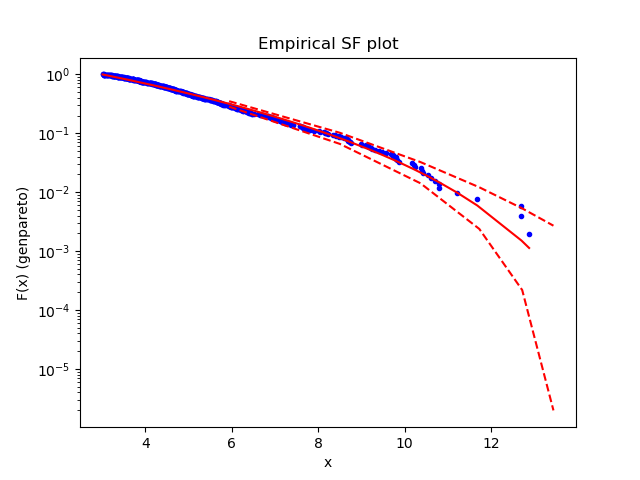

c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:52: UserWarning: Exceeded max iterations. (p_min0=[-42.05365134], p_min=[-42.05365134], p=-9.210340371976182)
  warnings.warn(msg)
c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:572: UserWarning: Lower bound is smaller
  warnings.warn('Lower bound is smaller')


In [22]:
gpd3 = ws.genpareto.fit2(Hs[Hs>3],floc=3)
fig, axes = plt.subplots()
gpd3.plotesf(plot_ci=True)

Exceedances of significant wave-height data over level 7,

<IPython.core.display.Javascript object>


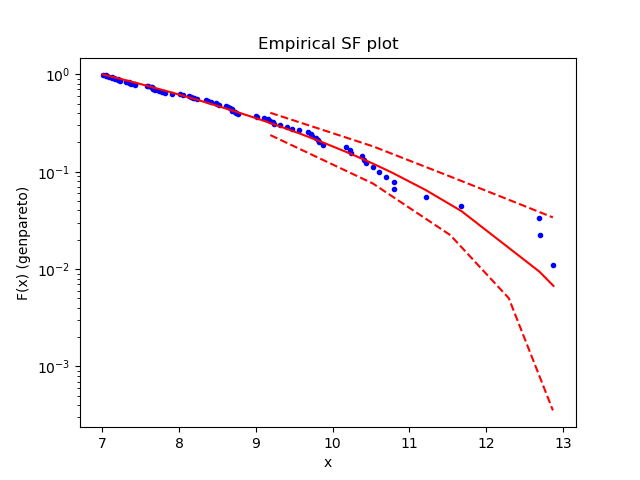

c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:52: UserWarning: Exceeded max iterations. (p_min0=[-32.03358494], p_min=[-32.03358494], p=-5.948344823567952)
  warnings.warn(msg)
c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:572: UserWarning: Lower bound is smaller
  warnings.warn('Lower bound is smaller')
c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:52: UserWarning: Exceeded max iterations. (p_min0=[-48.50460702], p_min=[-48.50460702], p=-6.907755278982137)
  warnings.warn(msg)
c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:572: UserWarning: Lower bound is smaller
  warnings.warn('Lower bound is smaller')


In [23]:
gpd7 = ws.genpareto.fit2(Hs[Hs>7], floc=7)
fig, axes = plt.subplots()
gpd7.plotesf(plot_ci=True)

Simulates 100 values from the GEV distribution with parameters (0.3, 1, 2), then estimates the
parameters using two different methods and plots the estimated distribution functions together
with the empirical distribution.


<IPython.core.display.Javascript object>


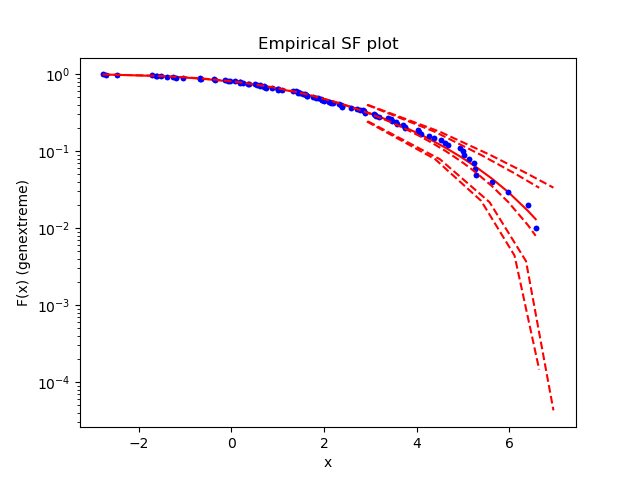

c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:52: UserWarning: Exceeded max iterations. (p_min0=[-32.88951565], p_min=[-32.88951565], p=-5.948344823567952)
  warnings.warn(msg)
c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:572: UserWarning: Lower bound is smaller
  warnings.warn('Lower bound is smaller')
c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:52: UserWarning: Exceeded max iterations. (p_min0=[-48.58099765], p_min=[-48.58099765], p=-6.907755278982137)
  warnings.warn(msg)
c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:572: UserWarning: Lower bound is smaller
  warnings.warn('Lower bound is smaller')
c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:52: UserWarning: Exceeded max iterations. (p_min0=[-32.77204986], p_min=[-32.77204986], p=-5.948344823567952)
  warnings.warn(msg)
c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:572: UserWarnin

In [24]:
Rgev = ws.genextreme.rvs(0.3,1,2,size=100)
gp = ws.genextreme.fit2(Rgev,method='mps')
gm = ws.genextreme.fit2(Rgev,method='ml')
fig, axes = plt.subplots()
gp.plotesf(plot_ci=True)

gm.plotesf('r--', plot_ci=True)

Similarly for the GPD distribution

<IPython.core.display.Javascript object>


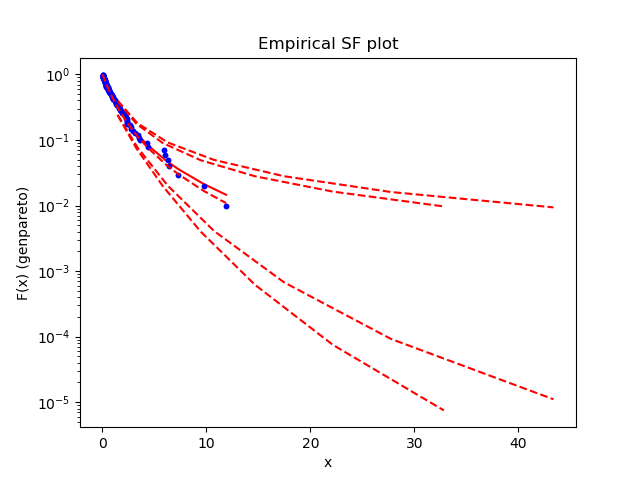

c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:399: UserWarning: The fitted parameters does not provide the optimum fit. Something wrong with fit (par = [ 0.37168439  0.00751082 -1.15129255], par_old= [0.372975   0.00751082 1.00753891], dl = 3.635330412521398e-05)
  '(par = {}, par_old= {}, dl = {})'.format(str(par), par_old, dL))
c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:399: UserWarning: The fitted parameters does not provide the optimum fit. Something wrong with fit (par = [ 0.37168439  0.00751082 -1.15400983], par_old= [ 0.37168439  0.00751082 -1.15129255], dl = 0.001858732342100211)
  '(par = {}, par_old= {}, dl = {})'.format(str(par), par_old, dL))
c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:399: UserWarning: The fitted parameters does not provide the optimum fit. Something wrong with fit (par = [ 0.37168439  0.00751082 -1.15674992], par_old= [ 0.37168439  0.00751082 -1.15400983], dl = 0.0013935993115

In [25]:
Rgpd = ws.genpareto.rvs(0.4,size=100);
gmps = ws.genpareto.fit2(Rgpd, method='mps')
gml = ws.genpareto.fit2(Rgpd, method='ml')
fig, axes = plt.subplots()
gmps.plotesf(plot_ci=True)
gml.plotesf('r--', plot_ci=True)

Return values for the GEV distribution

<IPython.core.display.Javascript object>


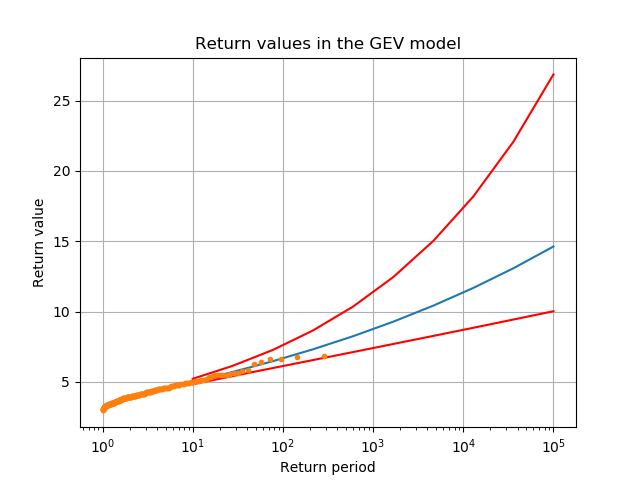

In [26]:
T = np.logspace(1, 5, 10)
prb = ws.returnperiod2sf(T)
sT = Y5gev.isf(prb)
ci = []
t = []
for Ti, sTi in zip(T, sT):
    try:
        Lx = Y5gev.profile_quantile(sTi, i=2)
        ci.append(Lx.get_bounds(alpha=0.05))
        t.append(Ti)
    except Exception:
        pass
fig, axes = plt.subplots()
plt.semilogx(T,sT, t, ci,'r')

N = np.r_[1:len(Y5M)+1]
Nmax = max(N)
plt.plot(Nmax/N, sorted(Y5M, reverse=True), '.')
plt.title('Return values in the GEV model')
plt.xlabel('Return period')
plt.ylabel('Return value') 
plt.grid(True) 

FitDistribution:
alpha = 0.05
method = ml
LLmax = -11.128629805794906
LPSmax = -257.2550042835685
pvalue = 0.13372373915746416
par = [-0.60209465  0.5         0.82545365]
par_lower = [-0.82647189  0.5         0.57002617]
par_upper = [-0.37771741  0.5         1.08088113]
par_fix = [nan, 0.5, nan]
par_cov = [[ 0.01310574  0.         -0.01448574]
 [ 0.          0.          0.        ]
 [-0.01448574  0.          0.01698396]]



<IPython.core.display.Javascript object>


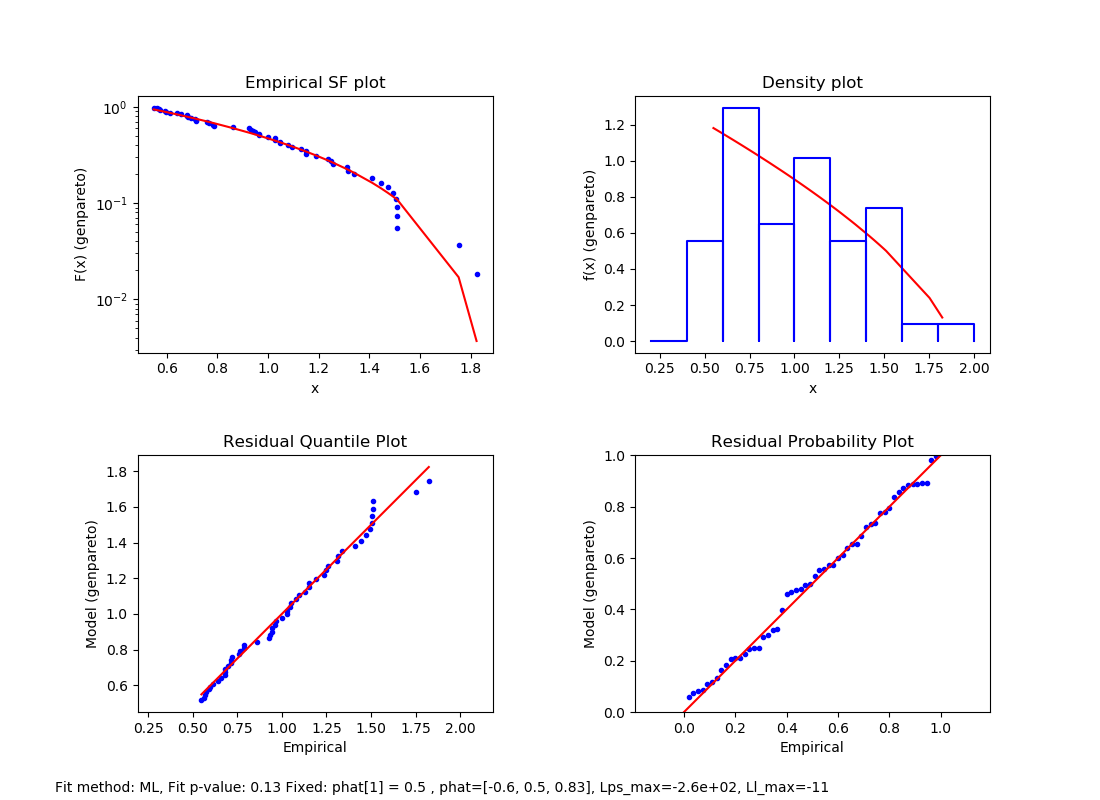

In [36]:
import wafo.stats as ws
R = ws.genpareto.rvs(-0.5,size=100);
phat = ws.genpareto.fit2(R[R>.5], -.5, scale=1., floc=0.5)
print(phat)
phat.plotfitsummary()

<IPython.core.display.Javascript object>


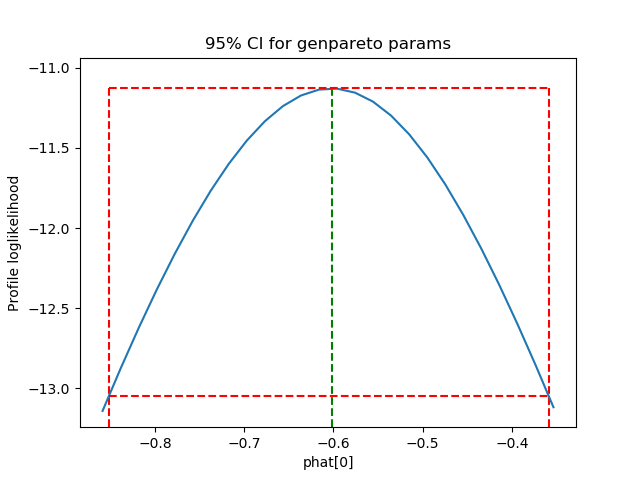

phat0_ci = [-0.80615307 -0.40361018]


In [37]:
# Better CI for phat.par[i=0] shape parameter
Lp0 = phat.profile(i=0, pmin=-1,pmax=1)
fig, axes = plt.subplots()
Lp0.plot()
phat0_ci = Lp0.get_bounds(alpha=0.1)
print('phat0_ci = {}'.format(phat0_ci))


<IPython.core.display.Javascript object>


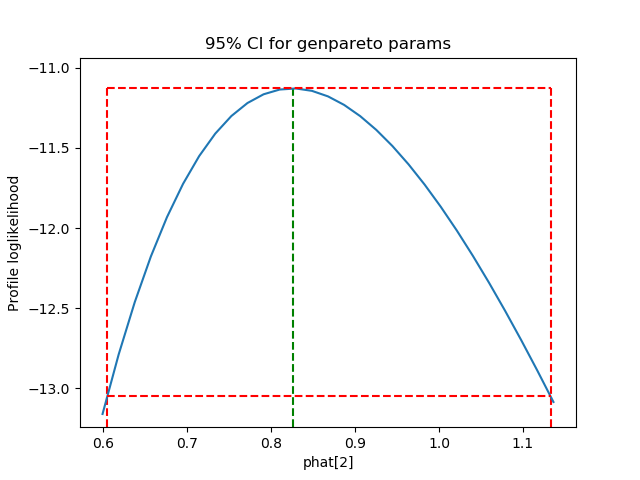

phat2_ci = [0.63620868 1.07500056]


In [38]:
# Better CI for phat.par[i=2] scale 
Lp2 = phat.profile(i=2,pmin=0.1,pmax=2)
fig, axes = plt.subplots()
Lp2.plot()
phat2_ci = Lp2.get_bounds(alpha=0.1)
print('phat2_ci = {}'.format(phat2_ci))


1.8494236443608596
FitDistribution:
alpha = 0.05
method = ml
LLmax = -11.128629805794906
LPSmax = -257.2550042835685
pvalue = 0.13372373915746416
par = [-0.60209465  0.5         0.82545365]
par_lower = [-0.82647189  0.5         0.57002617]
par_upper = [-0.37771741  0.5         1.08088113]
par_fix = [nan, 0.5, nan]
par_cov = [[ 0.01310574  0.         -0.01448574]
 [ 0.          0.          0.        ]
 [-0.01448574  0.          0.01698396]]



<IPython.core.display.Javascript object>


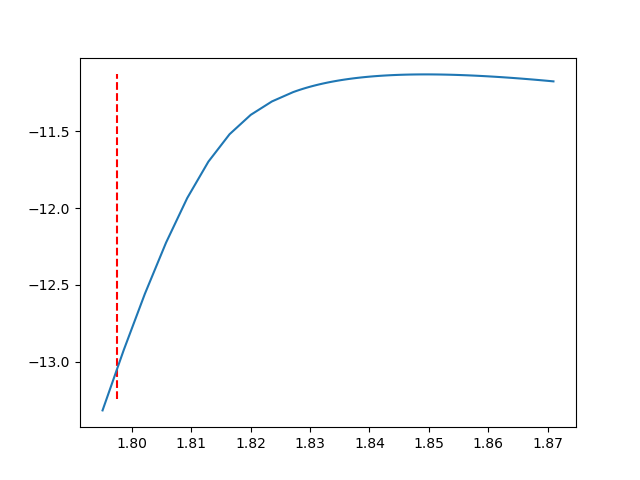

c:\users\peran\documents\workspace\pywafo\src\wafo\stats\estimation.py:569: UserWarning: Upper bound is larger
  warnings.warn('Upper bound is larger')


TypeError: '<=' not supported between instances of 'float' and 'NoneType'

In [40]:
SF = 1./990
x = phat.isf(SF)
print(x)
print(phat)
# CI for x
Lx = phat.profile_quantile(x, i=2)
fig, axes = plt.subplots()
Lx.plot()
x_ci = Lx.get_bounds(alpha=0.2)
print('X_ci = {}'.format(x_ci))